Galactic Archaeology with HERMES (GALAH; Silva et al. 2015; Buder et al. 2018, 2021)

In [1]:
import sys

!which {sys.executable}

/ut3/jerome/miniconda3/envs/wakai/bin/python


In [2]:
import sys
sys.path.insert(0, '../code')

https://vizier.cds.unistra.fr/viz-bin/VizieR?-source=J/ApJS/271/58

In [3]:
from catalog import VIZIER_KEYS_LiEW_CATALOG

#add custom catalog for Lithium
VIZIER_KEYS_LiEW_CATALOG['Buder2023'] = "J/MNRAS/506/150"

In [8]:
from catalog import CatalogDownloader

cd = CatalogDownloader(catalog_name="Buder2023", catalog_type="liew")
tabs = cd.get_tables_from_vizier(row_limit=-1)

Data url: https://vizier.u-strasbg.fr/viz-bin/VizieR?-source=J/MNRAS/506/150
{'J/MNRAS/506/150/ages': 'GALAH DR3 VAC ages',
 'J/MNRAS/506/150/dyn': 'GALAH DR3 VAC dynamics',
 'J/MNRAS/506/150/rv': 'GALAH DR3 VAC radial velocities',
 'J/MNRAS/506/150/spect': 'GALAH DR3 main all spectra',
 'J/MNRAS/506/150/stars': 'GALAH DR3 main all stars'}


In [11]:
df = tabs[0].to_pandas()
df.head()

,GALAH,Teff,logg,__Fe_H_,Vmic,Vbroad,__alpha_Fe_,__Li_Fe_,__C_Fe_,__O_Fe_,...,__Ce_Fe_,__Nd_Fe_,__Sm_Fe_,__Eu_Fe_,RA_ICRS,DE_ICRS,RVgalah,RVGaiaDR2,_RA.icrs,_DE.icrs
0,131116000501002,4553.350098,4.714953,-0.335019,0.948537,9.345594,0.351368,-0.183756,NaN,1.214647,...,NaN,NaN,NaN,NaN,53.221132,-68.674800,36.203999,35.907078,53.221132,-68.674800
1,131116000501003,3622.739990,4.691505,NaN,0.799639,14.891972,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,53.726021,-68.611051,55.373326,NaN,53.726021,-68.611051
2,131116000501004,4852.479980,2.466885,-1.170157,1.202963,8.185776,0.273048,1.070449,NaN,0.759033,...,0.911001,1.395719,1.039035,0.831204,55.593979,-68.697931,95.877998,NaN,55.593979,-68.697931
3,131116000501005,5588.500000,3.999357,0.052395,1.111983,12.291694,-0.015430,0.534573,-0.012350,-0.019165,...,NaN,NaN,NaN,NaN,54.392072,-68.685002,7.130000,NaN,54.392072,-68.685002
4,131116000501006,5709.500000,4.181905,-0.013732,1.138507,12.961143,0.081023,1.037844,0.122847,-0.030804,...,NaN,NaN,NaN,NaN,55.770494,-68.722453,24.816000,28.709490,55.770494,-68.722453


In [12]:
df.shape

(588571, 43)

In [19]:
df.to_csv('../data/Buder2023_GALAH/ages.csv', index=False)

In [21]:
import astropy.units as u
from astroquery.xmatch import XMatch
import pandas as pd

with open('../data/Buder2023_GALAH/ages.csv', 'r') as file:
    gaia_table = XMatch.query(
        cat1=file,
        cat2="vizier:I/355/gaiadr3",
        max_distance=1 * u.arcsec,
        colRA1="RA_ICRS",
        colDec1="DE_ICRS"
    )
gaia_df = gaia_table.to_pandas()
gaia_df.head()

HTTPError: 400 Client Error: Mauvaise Requête for url: http://cdsxmatch.u-strasbg.fr/xmatch/api/v1/sync

In [ ]:
matches['GaiaDR3'] = matches['DR3Name'].apply(lambda x: int(x.split()[-1]))

In [ ]:
matches.to_csv('../data/galah_GaiaDR3_xmatch.csv', index=False)

In [7]:
import pandas as pd

matches = pd.read_csv('../data/TOIs_GaiaDR3_xmatch.csv')
matches.head()

,angDist,TIC ID,TOI,Previous CTOI,Master,SG1A,SG1B,SG2,SG3,SG4,...,E(BP-RP),b_E(BP-RP),B_E(BP-RP),Lib,RAJ2000,DEJ2000,e_RAJ2000,e_DEJ2000,RADEcorJ2000,GaiaDR3
0,0.045188,164249928,6797.01,NaN,3,4,3,3,1,4,...,0.1857,0.1729,0.1953,MARCS,304.395077,-28.821273,0.706557,0.558226,0.4318,6845643580189962112
1,0.030103,290403522,6798.01,TIC 290403522.01,3,4,4,3,1,4,...,0.0063,0.0041,0.0083,PHOENIX,330.957845,-72.440757,0.254609,0.271682,-0.2895,6383086975484001664
2,0.024988,387295547,6799.01,NaN,3,4,3,3,1,4,...,0.0101,0.0080,0.0124,MARCS,312.696456,-58.943253,0.163943,0.208840,0.0303,6455534513895249664
3,0.032030,254174907,6800.01,NaN,3,4,3,3,1,4,...,NaN,NaN,NaN,NaN,287.258754,-41.100052,0.249032,0.231111,0.1247,6717161656460906496
4,0.050634,90935995,6801.01,NaN,3,4,4,3,1,4,...,0.1740,0.1669,0.1826,MARCS,308.185004,-44.580820,0.273749,0.225949,0.1654,6675727973810659712


In [8]:
matches.shape

(5700, 203)

In [9]:
df_li.Gaia.isin(matches.GaiaDR3).sum()

121

In [10]:
idx=matches.GaiaDR3.isin(df_li.Gaia)
matches[idx]

,angDist,TIC ID,TOI,Previous CTOI,Master,SG1A,SG1B,SG2,SG3,SG4,...,E(BP-RP),b_E(BP-RP),B_E(BP-RP),Lib,RAJ2000,DEJ2000,e_RAJ2000,e_DEJ2000,RADEcorJ2000,GaiaDR3
62,0.012765,405269313,6865.01,NaN,3,4,3,3,1,4,...,0.1379,0.1357,0.1442,PHOENIX,0.935811,11.332342,0.404489,0.292436,0.3757,2765861842300208384
67,0.020774,426471754,6871.01,NaN,1,4,1,1,3,4,...,0.0294,0.0176,0.0380,MARCS,48.936829,18.484698,0.282543,0.261685,0.4108,59132048875310080
72,0.023782,365007485,6877.01,TIC 365007485.01,5,5,5,5,5,5,...,0.0025,0.0007,0.0053,MARCS,164.189538,9.673962,0.232188,0.213705,-0.2126,3867810120985878272
77,0.006237,156514476,6884.01,TIC 156514476.01,3,4,3,3,4,4,...,0.0014,0.0002,0.0035,MARCS,193.008844,26.673930,0.288421,0.286172,-0.3857,3961540914568972928
80,0.015302,39174810,6887.01,TIC 39174810.01,3,4,3,3,4,4,...,0.0133,0.0102,0.0161,MARCS,184.083788,39.149810,0.226607,0.248146,-0.0658,1532796827769047936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5626,0.038956,17538423,5682.01,NaN,3,4,3,3,4,4,...,0.0044,0.0011,0.0108,MARCS,243.316253,34.332096,0.147992,0.202279,0.1809,1329688756350485888
5649,0.061040,173002823,5710.01,NaN,2,4,2,2,4,4,...,0.0006,0.0001,0.0015,MARCS,150.603358,34.658435,0.230553,0.237101,-0.3243,795464815514180480
5666,0.076565,224297408,5733.01,NaN,2,4,2,2,4,4,...,0.0592,0.0512,0.0626,MARCS,184.966965,55.165637,0.180799,0.196594,0.1331,1572801222611587840
5675,0.090380,18016577,5745.01,NaN,2,4,2,2,4,4,...,0.0538,0.0527,0.0553,MARCS,171.574282,38.220884,0.302336,0.269090,-0.1865,761081437645780864


In [11]:
final = pd.merge(df_li, matches, left_on='Gaia', right_on='GaiaDR3')
final.head()

,LAMOST,ObsID,Gaia,RAJ2000_x,DEJ2000_x,S_N,RVel,Teff_x,logg_x,__Fe_H_,...,E(BP-RP),b_E(BP-RP),B_E(BP-RP),Lib,RAJ2000_y,DEJ2000_y,e_RAJ2000,e_DEJ2000,RADEcorJ2000,GaiaDR3
0,J150552.71+393811.5,825115147,1295879048673833984,15 05 52.71,+39 38 11.6,7,-17,5946,4.35,0.11,...,0.0005,0.0001,0.0025,MARCS,226.469884,39.636407,0.176414,0.221452,0.3077,1295879048673833984
1,J110910.79+495720.8,640903108,838054604575246848,11 09 10.80,+49 57 20.9,5,-17,5399,4.41,0.46,...,0.0088,0.0057,0.0124,MARCS,167.295003,49.955822,0.181852,0.174068,0.1930,838054604575246848
2,J065651.37+223544.5,652913045,3380005636930056704,06 56 51.37,+22 35 44.6,4,10,5817,4.13,0.23,...,0.0014,0.0003,0.0038,PHOENIX,104.214044,22.595730,0.293336,0.228824,-0.1432,3380005636930056704
3,J092741.06+461251.7,626807245,819259415370816512,09 27 41.07,+46 12 51.8,4,-77,4646,4.58,0.24,...,0.0196,0.0081,0.0251,MARCS,141.920994,46.214432,0.262280,0.241472,-0.0955,819259415370816512
4,J084445.93+161437.2,624210199,658130865403183872,08 44 45.93,+16 14 37.3,4,11,5893,3.92,0.12,...,0.0030,0.0008,0.0061,MARCS,131.191388,16.243680,0.260092,0.184380,-0.3052,658130865403183872


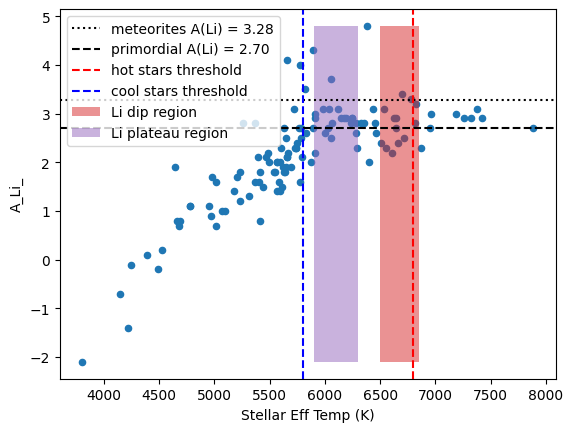

In [12]:
x = 'Stellar Eff Temp (K)'
y = 'A_Li_'
ax = final.plot.scatter(x=x, y=y)
ax.axhline(3.28, 0, 1, ls='dotted', c='k', label = "meteorites A(Li) = 3.28")
ax.axhline(2.7, 0, 1, ls='--', c='k', label = "primordial A(Li) = 2.70")
# Hotter stars (Teff > 6800 K), with relatively shallow convective zones,
# should preserve the primordial lithium within their stellar atmospheres
ax.axvline(6800, 0, 1, ls='--', c='r', label='hot stars threshold')
ax.axvline(5800, 0, 1, ls='--', c='b', label='cool stars threshold')
ax.fill_betweenx(y=[final[y].min(), final[y].max()],
                 x1=6500, x2=6850, label='Li dip region',
                facecolor="C3", alpha=0.5)
ax.fill_betweenx(y=[final[y].min(), final[y].max()],
                 x1=5900, x2=6300, label='Li plateau region',
                facecolor="C4", alpha=0.5)
ax.legend()

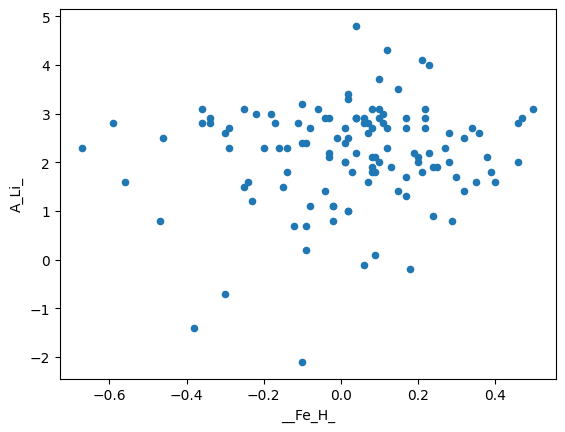

In [13]:
#thin and thick disk star
ax = final.plot.scatter(x='__Fe_H_', y='A_Li_')

In [14]:
final.sort_values(by='A_Li_', ascending=False).TOI

12    3823.01
4     5158.01
15    5160.01
2     5120.01
16    5923.01
       ...   
89    4512.01
97    3842.01
36    5155.01
32    2018.01
72    5111.01
Name: TOI, Length: 122, dtype: float64